# Wasserstein Singular Vectors

This Jupyter Notebook will walk you through an easy example of Wasserstein Singular Vectors (WSV). This example is small enough to be run on CPU.

## Imports

In [1]:
import wsingular
import torch
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Generate toy data

In [2]:
# Define the dtype and device to work with.
dtype = torch.double
device = "cpu"

In [3]:
# Define the dimensions of our problem.
n_samples = 20
n_features = 30

In [4]:
# Initialize an empty dataset.
dataset = torch.zeros((n_samples, n_features), dtype=dtype)

# Iterate over the features and samples.
for i in range(n_samples):
    for j in range(n_features):

        # Fill the dataset with translated histograms.
        dataset[i, j] = i/n_samples - j/n_features
        dataset[i, j] = torch.abs(dataset[i, j] % 1)

# Take the distance to 0 on the torus.
dataset = torch.min(dataset, 1 - dataset)

# Make it a guassian.
dataset = torch.exp(-(dataset**2) / 0.1)

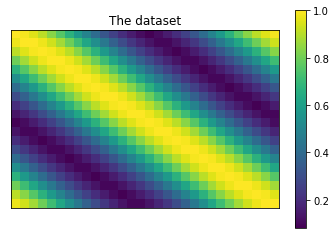

In [5]:
# Plot the dataset.
plt.title('The dataset')
plt.imshow(dataset)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()

## Compute the WSV

In [6]:
# Compute the WSV.
C, D = wsingular.wasserstein_singular_vectors(
    dataset,
    n_iter=100,
    dtype=dtype,
    device=device,
)


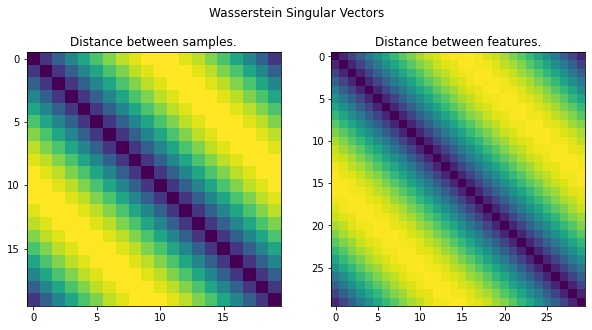

In [7]:
# Display the WSV.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Wasserstein Singular Vectors')

axes[0].set_title('Distance between samples.')
axes[0].imshow(D)
axes[0].set_xticks(range(0, n_samples, 5))
axes[0].set_yticks(range(0, n_samples, 5))

axes[1].set_title('Distance between features.')
axes[1].imshow(C)
axes[1].set_xticks(range(0, n_features, 5))
axes[1].set_yticks(range(0, n_features, 5))

plt.show()

In [8]:
A, B = wsingular.utils.normalize_dataset(dataset, dtype=dtype, device=device)
wsingular.utils.check_uniqueness(A, B, C, D)

True